<class 'pandas.core.frame.DataFrame'>
Index: 70060 entries, 0 to 14011
Columns: 445 entries, Unnamed: 1 to New Column
dtypes: float64(444), object(1)
memory usage: 238.4+ MB


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 444, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 443, 128)            │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 442, 128)            │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 221, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 221, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │      28,289,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 569)                 │         569,569 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,892,849 (114.03 MB)

 Trainable params: 29,892,849 (114.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.0027 - loss: 6.3471 - val_accuracy: 0.0036 - val_loss: 6.3154
Epoch 2/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.0100 - loss: 6.2382 - val_accuracy: 0.0669 - val_loss: 5.7481
Epoch 3/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.2002 - loss: 4.8016 - val_accuracy: 0.4065 - val_loss: 3.6135
Epoch 4/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.5750 - loss: 2.4001 - val_accuracy: 0.6502 - val_loss: 2.3126
Epoch 5/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.7800 - loss: 1.1333 - val_accuracy: 0.7860 - val_loss: 1.7173
Epoch 6/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.8943 - loss: 0.5102 - val_accuracy: 0.8608 - val_loss: 1.5132
Epoch 7/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9359 - loss: 0.2834 - val_accuracy: 0.8859 - val_loss: 1.4865
Epoch 8/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9512 - loss: 0.2078 - 

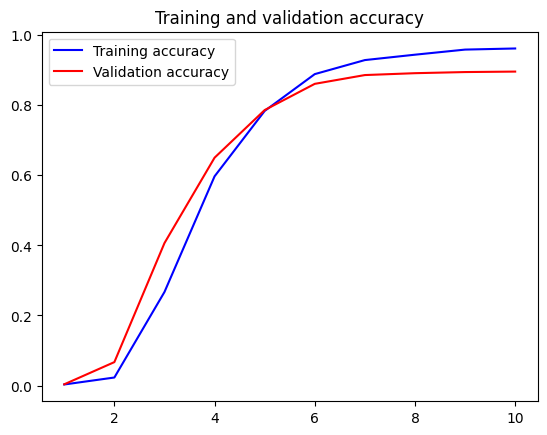

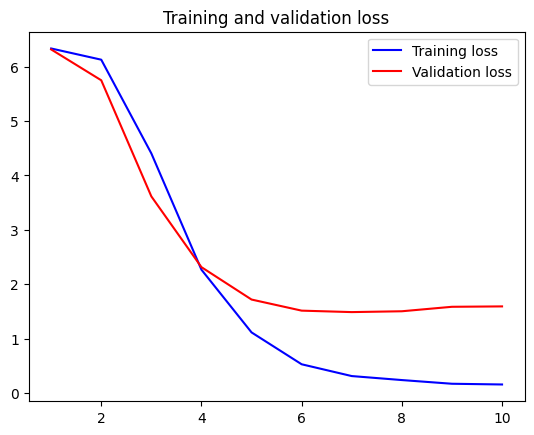

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten
import matplotlib.pyplot as plt

# Load datasets
data_1 = pd.read_excel("AF4_NEW.xlsx")
data_2 = pd.read_excel("T7_NEW.xlsx")
data_3 = pd.read_excel("T8_NEW.xlsx")
data = pd.read_excel("AF3_NEW.xlsx")
data_4 = pd.read_excel("PZ_NEW.xlsx")
frames = [data, data_1, data_2, data_3, data_4]

# Concatenate datasets
data_f = pd.concat(frames)
data_f.info()

# Prepare input (X) and output (Y)
X = np.asarray(data_f.iloc[:, :-1].values).astype(float)
Y = np.asarray(data_f.iloc[:, -1].values)

# Scale the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# Encode the labels
le = LabelEncoder()
le.fit(y_train)
Y_train = le.transform(y_train)
Y_test = le.transform(y_test)

# Reshape the input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
input_layer = Input(shape=(X_train.shape[1], 1))
conv1 = Conv1D(filters=128, kernel_size=2, activation='relu')(input_layer)
conv2 = Conv1D(filters=128, kernel_size=2, activation='relu')(conv1)
pool1 = MaxPooling1D(pool_size=2)(conv2)
drop1 = Dropout(0.1)(pool1)

flat = Flatten()(drop1)
dense1 = Dense(1000, activation='relu')(flat)
dense2 = Dense(1000, activation='relu')(dense1)
drop2 = Dropout(0.2)(dense2)

output_layer = Dense(len(le.classes_), activation='softmax')(drop2)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=100, verbose=1, shuffle=True, validation_data=(X_test, Y_test))

# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0, batch_size=200)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

# Predict on test data
pred = model.predict(X_test, verbose=0, batch_size=200)
pred = np.argmax(pred, axis=1)

# Inverse transform to get the original labels
y_actual = le.inverse_transform(Y_test)
y_pred = le.inverse_transform(pred)

# Print actual and predicted labels
print("Actual labels:", y_actual[:10])
print("Predicted labels:", y_pred[:10])

# Classification report
print("Classification Report:\n", classification_report(y_actual, y_pred))

# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Accuracy.jpg')

# Plot training and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss.jpg')
